In [418]:
import numpy as np
import pandas as pd

In [419]:
train= pd.read_csv("D:/Python/Edvancer/Project 3/counterfeit_train (1).csv")

In [420]:
test=pd.read_csv("D:/Python/Edvancer/Project 3/counterfeit_test (1).csv")

In [421]:
sample_submission=pd.read_csv("D:/Python/Edvancer/Project 3/sample_submission.csv")

In [422]:
train.describe(percentiles=[0.01,0.10,0.90,0.95,0.99]).T

,count,mean,std,min,1%,10%,50%,90%,95%,99%,max
Counterfeit_Weight,5652.0,14.115057,4.649668,5.855,6.450000,7.970000,13.800000,20.650000,21.550000,22.150000,22.650000
Active_Since,6818.0,1995.836316,8.368979,1983.000,1983.000000,1983.000000,1997.000000,2007.000000,2007.000000,2007.000000,2007.000000
Medicine_MRP,6818.0,151.401518,62.203961,41.790,45.325256,62.864000,153.195700,241.641040,260.740800,273.311856,277.188400
Availability_rating,6818.0,0.079174,0.051481,0.013,0.013000,0.025087,0.066955,0.152711,0.176885,0.238329,0.341391
Counterfeit_Sales,6818.0,2280.583480,1693.354404,146.290,198.888200,451.026660,1902.670400,4643.902160,5582.547000,7350.518978,13199.964800


In [423]:
### Not seeing any major oultier variable other than sales ####
train.loc[train["Counterfeit_Sales"]>train["Counterfeit_Sales"].quantile(0.99),"Counterfeit_Sales"]=train["Counterfeit_Sales"].quantile(0.99)

In [424]:
test["Counterfeit_Sales"]=0
train["Temp"]="train"
test["Temp"]="test"
combi=pd.concat([train,test],axis=0,ignore_index=True)

In [425]:
combi.describe(percentiles=[0.01,0.10,0.90,0.95,0.99]).T

,count,mean,std,min,1%,10%,50%,90%,95%,99%,max
Counterfeit_Weight,7060.0,14.157645,4.643456,5.855,6.450000,7.995000,13.900000,20.650000,21.55000,22.150000,22.650000
Active_Since,8523.0,1995.831867,8.371760,1983.000,1983.000000,1983.000000,1997.000000,2007.000000,2007.00000,2007.000000,2007.000000
Medicine_MRP,8523.0,151.292782,62.275067,41.590,45.362752,63.095600,153.312800,241.500480,261.06924,273.322600,277.188400
Availability_rating,8523.0,0.079132,0.051598,0.013,0.013000,0.025042,0.066931,0.152514,0.17678,0.239249,0.341391
Counterfeit_Sales,8523.0,1814.283486,1729.203335,0.000,0.000000,0.000000,1411.310000,4322.986560,5319.55600,7170.919428,7350.518978


In [426]:
### Not seeing any other major oultier variable ####

In [427]:
combi.apply(lambda x : sum(x.isnull()))

Medicine_ID               0
Counterfeit_Weight     1463
DistArea_ID               0
Active_Since              0
Medicine_MRP              0
Medicine_Type             0
SidEffect_Level           0
Availability_rating       0
Area_Type                 0
Area_City_Type            0
Area_dist_level           0
Counterfeit_Sales         0
Temp                      0
dtype: int64

In [428]:
cat_col= [x for x in combi.dtypes.index if combi.dtypes[x]=="object"]

In [429]:
cat_col=[x for x in cat_col if x not in ["Medicine_ID","Temp"]]
for i in cat_col:
    print("Frequency of categories %s"%i)
    print(combi[i].value_counts(dropna=False))

Frequency of categories DistArea_ID
Area027    935
Area013    932
Area049    930
Area035    930
Area046    930
Area045    929
Area018    928
Area017    926
Area010    555
Area019    528
Name: DistArea_ID, dtype: int64
Frequency of categories Medicine_Type
Antibiotics           1232
Hreplacements         1200
Antiseptics            910
OralContraceptives     856
Antipyretics           682
Cardiac                649
Mstablizers            648
Tranquilizers          520
Analgesics             445
Antimalarial           425
Antacids               251
Statins                214
MuscleRelaxants        169
Antifungal             148
Stimulants             110
Antiviral               64
Name: Medicine_Type, dtype: int64
Frequency of categories SidEffect_Level
mild        5517
critical    3006
Name: SidEffect_Level, dtype: int64
Frequency of categories Area_Type
DownTown              5577
MidTownResidential    1083
CityLimits             935
Industrial             928
Name: Area_Type, dtype: in

In [430]:
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [431]:
import seaborn as sns

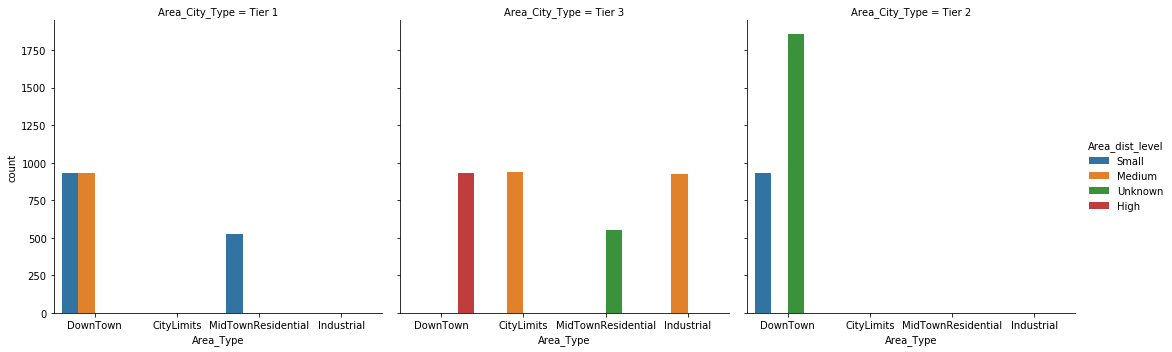

In [432]:
sns.catplot(x="Area_Type",hue="Area_dist_level",col="Area_City_Type",data= combi,kind="count")

In [433]:
### Based on the above graph and understanding of data replacing the Unknown values #######################
combi.loc[(combi["Area_Type"]=="DownTown") & (combi["Area_dist_level"]=="Unknown"),"Area_dist_level"]="Medium"

In [434]:
combi.loc[(combi["Area_Type"]=="MidTownResidential") & (combi["Area_dist_level"]=="Unknown"),"Area_dist_level"]="High"

In [435]:
combi["number_of_active_years"]=2019-combi["Active_Since"]

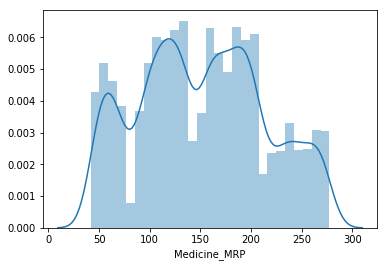

In [436]:
sns.distplot(combi["Medicine_MRP"],kde=True, hist=True) ### We can see there are different clusters, we can create new variable ###

In [437]:
combi["Item_MRP_cluster"]=0

In [438]:
combi.loc[combi["Medicine_MRP"]< 67,"Item_MRP_cluster"]=1
combi.loc[(combi["Medicine_MRP"]> 67) & (combi["Medicine_MRP"]< 146),"Item_MRP_cluster"]=2
combi.loc[(combi["Medicine_MRP"]>146) & (combi["Medicine_MRP"]<203),"Item_MRP_cluster"]=3
combi.loc[(combi["Medicine_MRP"]>203),"Item_MRP_cluster"]=4

In [439]:
item_avg_weight= combi.groupby(["Medicine_ID"])["Counterfeit_Weight"].mean()

In [440]:
missing_value=combi["Counterfeit_Weight"].isnull()

In [441]:
item_avg_weight

Medicine_ID
12-Jul    20.650
AAJ32      9.400
AAS12     15.800
ACC80     18.050
ACW12     20.650
ADE15      6.510
ADO13     16.800
ADT76     21.150
AEF11     14.950
AEL80     21.500
AEN20      8.800
AEX84      6.455
AFO34     15.950
AFS55      7.475
AFT64     11.195
AGF42     17.000
AGR82     11.800
AHC49     10.495
AHC53     10.275
AHD74     14.150
AHF89     13.800
AHZ10     11.800
AHZ15      6.700
AIR10     10.190
AJA15      9.680
AJF83     20.650
AJM90     20.150
AJO33     17.800
AKD11     13.950
AKE16     19.150
           ...  
ZLS67     13.800
ZMR15     11.995
ZNR36     18.000
ZOJ13      9.455
ZPF14     17.550
ZPQ72     10.600
ZQK44      7.720
ZQS14     18.900
ZQT22      7.700
ZQW57     20.000
ZRC14      7.330
ZRF15      8.195
ZRM95      8.705
ZRO68     16.500
ZSC82     13.900
ZTE88     20.300
ZTV97     21.800
ZUC11     10.150
ZUE85     19.300
ZUU67      9.350
ZUZ10     21.150
ZVH10     14.950
ZVR52     21.650
ZWG14     17.050
ZWS21      8.850
ZXN29     10.900
ZXO53     13.800
ZY

In [442]:
################# Imputing missing values by median ######################
combi.loc[missing_value,"Counterfeit_Weight"]=combi.loc[missing_value,"Medicine_ID"].apply(lambda x:item_avg_weight[x])

In [443]:
item_avg_weight_2= combi.groupby(["Medicine_Type"])["Counterfeit_Weight"].mean()

In [444]:
missing_value_2=combi["Counterfeit_Weight"].isnull()

In [445]:
combi.loc[missing_value_2,"Counterfeit_Weight"]=combi.loc[missing_value_2,"Medicine_Type"].apply(lambda x:item_avg_weight_2[x])

In [446]:
total_num_Distarea= combi.groupby(["Medicine_ID"])["DistArea_ID"].nunique()

In [447]:
total_num_Distarea=pd.pivot_table(combi,values=['DistArea_ID'],index='Medicine_ID',aggfunc='count')

In [448]:
combi_Updated=pd.merge(combi,total_num_Distarea,on=['Medicine_ID'],how='left')

In [449]:
combi_Updated.rename(columns={"DistArea_ID_y": "total_dist_area"},inplace=True)

In [450]:
combi_Updated

,Medicine_ID,Counterfeit_Weight,DistArea_ID_x,Active_Since,Medicine_MRP,Medicine_Type,SidEffect_Level,Availability_rating,Area_Type,Area_City_Type,Area_dist_level,Counterfeit_Sales,Temp,number_of_active_years,Item_MRP_cluster,total_dist_area
0,RRA15,13.100,Area046,1995,160.2366,Antimalarial,critical,0.070422,DownTown,Tier 1,Small,1775.5026,train,24,3,7
1,YVV26,7.450,Area027,1983,110.4384,Mstablizers,mild,0.013000,CityLimits,Tier 3,Medium,3069.1520,train,36,2,7
2,LJC15,9.025,Area046,1995,259.4092,Cardiac,mild,0.060783,DownTown,Tier 1,Small,2603.0920,train,24,4,5
3,GWC40,11.800,Area046,1995,99.9830,OralContraceptives,mild,0.065555,DownTown,Tier 1,Small,1101.7130,train,24,2,5
4,QMN13,8.930,Area019,1983,56.4402,Hreplacements,critical,0.248859,MidTownResidential,Tier 1,Small,158.9402,train,36,1,6
5,JDG81,8.775,Area045,2000,165.5656,Antiseptics,mild,0.088881,DownTown,Tier 2,Medium,3047.8464,train,19,3,7
6,KPX48,18.000,Area018,2007,156.9102,Hreplacements,critical,0.051685,Industrial,Tier 3,Medium,2883.3938,train,12,3,7
7,CYW14,7.680,Area013,1985,154.3470,Antiseptics,mild,0.028150,DownTown,Tier 3,High,3262.2340,train,34,3,4
8,TVF57,18.550,Area046,1995,107.3068,Hreplacements,critical,0.060266,DownTown,Tier 1,Small,1959.9292,train,24,2,6
9,MGU75,9.510,Area013,1985,161.1392,Statins,mild,0.023755,DownTown,Tier 3,High,3095.7840,train,34,3,6


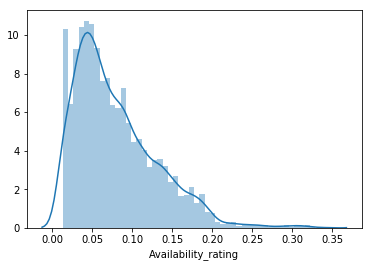

In [451]:
sns.distplot(combi_Updated["Availability_rating"],kde=True,hist=True) ### This means every product is visible, none of it is zero.

In [452]:
combi_Updated["Price_Per_Unit_Weight"]=combi_Updated["Medicine_MRP"]/combi_Updated["Counterfeit_Weight"]

In [453]:
dummy=pd.get_dummies(combi_Updated[["DistArea_ID_x","Medicine_Type","SidEffect_Level","Area_Type","Area_City_Type","Area_dist_level"]],drop_first=False)

In [454]:
combi_Updated=pd.concat([combi_Updated,dummy],axis=1)

In [455]:
combi_latest=combi_Updated.drop(["DistArea_ID_x","Medicine_Type","SidEffect_Level","Area_Type","Area_City_Type","Area_dist_level","Active_Since","Area_dist_level","Medicine_ID"],axis=1)

In [456]:
combi_latest

,Counterfeit_Weight,Medicine_MRP,Availability_rating,Counterfeit_Sales,Temp,number_of_active_years,Item_MRP_cluster,total_dist_area,Price_Per_Unit_Weight,DistArea_ID_x_Area010,...,Area_Type_CityLimits,Area_Type_DownTown,Area_Type_Industrial,Area_Type_MidTownResidential,Area_City_Type_Tier 1,Area_City_Type_Tier 2,Area_City_Type_Tier 3,Area_dist_level_High,Area_dist_level_Medium,Area_dist_level_Small
0,13.100,160.2366,0.070422,1775.5026,train,24,3,7,12.231802,0,...,0,1,0,0,1,0,0,0,0,1
1,7.450,110.4384,0.013000,3069.1520,train,36,2,7,14.823946,0,...,1,0,0,0,0,0,1,0,1,0
2,9.025,259.4092,0.060783,2603.0920,train,24,4,5,28.743402,0,...,0,1,0,0,1,0,0,0,0,1
3,11.800,99.9830,0.065555,1101.7130,train,24,2,5,8.473136,0,...,0,1,0,0,1,0,0,0,0,1
4,8.930,56.4402,0.248859,158.9402,train,36,1,6,6.320291,0,...,0,0,0,1,1,0,0,0,0,1
5,8.775,165.5656,0.088881,3047.8464,train,19,3,7,18.867875,0,...,0,1,0,0,0,1,0,0,1,0
6,18.000,156.9102,0.051685,2883.3938,train,12,3,7,8.717233,0,...,0,0,1,0,0,0,1,0,1,0
7,7.680,154.3470,0.028150,3262.2340,train,34,3,4,20.097266,0,...,0,1,0,0,0,0,1,1,0,0
8,18.550,107.3068,0.060266,1959.9292,train,24,2,6,5.784733,0,...,0,1,0,0,1,0,0,0,0,1
9,9.510,161.1392,0.023755,3095.7840,train,34,3,6,16.944185,0,...,0,1,0,0,0,0,1,1,0,0


In [457]:
training=combi_latest.loc[combi_latest["Temp"]=="train"]
testing=combi_latest.loc[combi_latest["Temp"]=="test"]

In [458]:
training.drop(["Temp"],axis=1, inplace=True)
testing.drop(["Temp"],axis=1,inplace=True)

In [459]:
np.random.seed(1234)

In [460]:
from sklearn.model_selection import KFold,train_test_split

In [461]:
x_train= training.drop(["Counterfeit_Sales"],axis=1)

In [462]:
y_train=training["Counterfeit_Sales"]

In [463]:
testing.drop(["Counterfeit_Sales"],axis=1,inplace=True)

In [464]:
X_train,X_test,Y_train,Y_test=train_test_split(x_train,y_train,test_size=0.30,random_state=43)

In [465]:
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [466]:
param_dist = {
              "max_depth": [2,3,4,5,6,8,10],
    "bootstrap": [True, False],
 "max_features":[i/10.0 for i in range(6,10)],
    "n_estimators":[100,500,700,1000]}

In [467]:
algo_1=RandomForestRegressor(criterion="mse")

In [468]:
n_iter=10

random_search_1=RandomizedSearchCV(algo_1,n_jobs=-1,verbose=2,cv=10,n_iter=n_iter,
                                 param_distributions=param_dist)

In [469]:
random_search_1.fit(X_train,Y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   33.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.3min finished


RandomizedSearchCV(cv=10, error_score='raise-deprecating',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=-1,
          param_distributions={'max_depth': [2, 3, 4, 5, 6, 8, 10], 'bootstrap': [True, False], 'max_features': [0.6, 0.7, 0.8, 0.9], 'n_estimators': [100, 500, 700, 1000]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [470]:
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.5f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [471]:
report(random_search_1.cv_results_,5)

Model with rank: 1
Mean validation score: 0.607 (std: 0.03185)
Parameters: {'n_estimators': 1000, 'max_features': 0.9, 'max_depth': 5, 'bootstrap': True}

Model with rank: 2
Mean validation score: 0.601 (std: 0.03282)
Parameters: {'n_estimators': 700, 'max_features': 0.7, 'max_depth': 6, 'bootstrap': False}

Model with rank: 3
Mean validation score: 0.600 (std: 0.03273)
Parameters: {'n_estimators': 1000, 'max_features': 0.6, 'max_depth': 8, 'bootstrap': True}

Model with rank: 4
Mean validation score: 0.598 (std: 0.03338)
Parameters: {'n_estimators': 500, 'max_features': 0.9, 'max_depth': 8, 'bootstrap': True}

Model with rank: 5
Mean validation score: 0.593 (std: 0.03075)
Parameters: {'n_estimators': 500, 'max_features': 0.8, 'max_depth': 4, 'bootstrap': False}



In [472]:
Rf_best= RandomForestRegressor(n_estimators=1000, max_features= 0.9, max_depth=5,bootstrap=True)

In [473]:
Rf_best.fit(X_train,Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features=0.9, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [474]:
scoring_1=mean_absolute_error(Y_test,Rf_best.predict(X_test))

In [475]:
scoring_1

749.7363553113081

In [476]:
1-(scoring_1/1660)

0.548351593185959

In [477]:
sample_submission["Counterfeit_Sales"]= Rf_best.predict(testing)

In [480]:
sample_submission.to_csv("D:/Python/Edvancer/Project 3/Sample/sample_submission.csv",header =True, index=False)

In [481]:
sample_submission

,Medicine_ID,Counterfeit_Sales
0,HLZ81,2071.228371
1,ECE94,4012.928587
2,SAD14,1583.273053
3,EQV63,360.652125
4,AIR10,394.081360
5,LIC37,548.947811
6,EXZ14,3994.643375
7,UCB79,3816.727408
8,IDJ12,5553.627781
9,KLQ71,1640.783573


In [299]:
# param_dist_xgb = {
#               "max_depth": [2,3,4,5,6],
#               "learning_rate":[0.01,0.05,0.1,0.3,0.5],
#     "min_child_weight":[4,5,6],
#               "subsample":[i/10.0 for i in range(6,10)],
#  "colsample_bytree":[i/10.0 for i in range(6,10)],
#                "reg_alpha":[1e-5, 1e-2, 0.1, 1, 100],
#               "gamma":[i/10.0 for i in range(0,5)],
#     "n_estimators":[100,500,700,1000]
#               }

In [339]:
# algo_2=XGBRegressor(objective="reg:linear")

In [301]:
# n_iter=10

# random_search_2=RandomizedSearchCV(algo_2,n_jobs=-1,verbose=2,cv=10,n_iter=n_iter,
#                                  param_distributions=param_dist_xgb)

In [302]:
# random_search_2.fit(X_train,Y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   51.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.5min finished


[18:35:02] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv=10, error_score='raise-deprecating',
          estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1),
          fit_params=None, iid='warn', n_iter=10, n_jobs=-1,
          param_distributions={'max_depth': [2, 3, 4, 5, 6], 'learning_rate': [0.01, 0.05, 0.1, 0.3, 0.5], 'min_child_weight': [4, 5, 6], 'subsample': [0.6, 0.7, 0.8, 0.9], 'colsample_bytree': [0.6, 0.7, 0.8, 0.9], 'reg_alpha': [1e-05, 0.01, 0.1, 1, 100], 'gamma': [0.0, 0.1, 0.2, 0.3, 0.4], 'n_estimators': [100, 500, 700, 1000]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          retur

In [303]:
# report(random_search_2.cv_results_,5)

Model with rank: 1
Mean validation score: 0.605 (std: 0.02886)
Parameters: {'subsample': 0.7, 'reg_alpha': 1, 'n_estimators': 100, 'min_child_weight': 6, 'max_depth': 3, 'learning_rate': 0.05, 'gamma': 0.2, 'colsample_bytree': 0.6}

Model with rank: 2
Mean validation score: 0.604 (std: 0.03045)
Parameters: {'subsample': 0.8, 'reg_alpha': 1, 'n_estimators': 100, 'min_child_weight': 4, 'max_depth': 2, 'learning_rate': 0.1, 'gamma': 0.1, 'colsample_bytree': 0.9}

Model with rank: 3
Mean validation score: 0.586 (std: 0.02911)
Parameters: {'subsample': 0.7, 'reg_alpha': 1, 'n_estimators': 100, 'min_child_weight': 6, 'max_depth': 2, 'learning_rate': 0.3, 'gamma': 0.2, 'colsample_bytree': 0.9}

Model with rank: 4
Mean validation score: 0.529 (std: 0.02425)
Parameters: {'subsample': 0.9, 'reg_alpha': 0.01, 'n_estimators': 1000, 'min_child_weight': 4, 'max_depth': 5, 'learning_rate': 0.05, 'gamma': 0.0, 'colsample_bytree': 0.6}

Model with rank: 5
Mean validation score: 0.516 (std: 0.02564)
Par

In [304]:
# xgb_best=XGBRegressor(max_depth=3,learning_rate=0.05, n_estimator=100,subsample=0.7,colsample_bytree=0.6,reg_alpha=1,min_child_weight=6,gamma=0.2)

In [305]:
# xgb_best.fit(X_train,Y_train)

[18:35:03] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.6, gamma=0.2,
       importance_type='gain', learning_rate=0.05, max_delta_step=0,
       max_depth=3, min_child_weight=6, missing=None, n_estimator=100,
       n_estimators=100, n_jobs=1, nthread=None, objective='reg:linear',
       random_state=0, reg_alpha=1, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=None, subsample=0.7, verbosity=1)

In [306]:
# scoring_2=mean_absolute_error(Y_test,xgb_best.predict(X_test))

In [307]:
# scoring_2

750.1586229736475

In [308]:
# 1-(scoring_2/1660)

0.5480972150761159

In [309]:
##### STACKING ###########################

In [310]:
# clf1=Lasso(fit_intercept=True,alpha=0.05)
# clf2=DecisionTreeRegressor(max_depth=6,min_impurity_decrease=1)
# clf3=RandomForestRegressor(n_estimators=1000,max_depth=5, max_features=0.9, random_state=42)
# clf4=XGBRegressor(max_depth=4,learning_rate=0.05, n_estimator=100,subsample=0.7,colsample_bytree=0.6, random_state=42,reg_alpha=1,min_child_weight=6,scale_post_weight=4,gamma=0.4)
# clf5=KNeighborsRegressor(n_neighbors=4)

In [311]:
# Algos=[clf1,clf2,clf3,clf4,clf5]

In [312]:
# X_train.shape[0]

4772

In [313]:
# rows=X_train.shape[0]

In [314]:
# layer1= pd.DataFrame({"clf1":np.zeros(rows),"clf2":np.zeros(rows),"clf3":np.zeros(rows),"clf4":np.zeros(rows),"clf5":np.zeros(rows)})

In [315]:
# kf=KFold(n_splits=10)

In [316]:
# fold=1
# for train,left_out_chunk in kf.split(X_train):
#     print('fold number : ', fold)
    
#     for i,clf in enumerate(Algos):
#         print('Algo number :',i+1)
        
#         x_train_train=X_train.iloc[train]
#         y_train_train=Y_train.iloc[train]
#         x_train_left_out_chunk=X_train.iloc[left_out_chunk]
        
#         clf.fit(x_train_train,y_train_train)
#         p=clf.predict(x_train_left_out_chunk)
        
#         layer1.iloc[left_out_chunk,i]=p
        
#     fold+=1

fold number :  1
Algo number : 1
Algo number : 2
Algo number : 3
Algo number : 4
[18:35:12] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Algo number : 5
fold number :  2
Algo number : 1
Algo number : 2
Algo number : 3
Algo number : 4
[18:35:20] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Algo number : 5
fold number :  3
Algo number : 1
Algo number : 2
Algo number : 3
Algo number : 4
[18:35:28] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Algo number : 5
fold number :  4
Algo number : 1
Algo number : 2
Algo number : 3
Algo number : 4
[18:35:36] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in

In [317]:
# layer1

,clf1,clf2,clf3,clf4,clf5
0,3423.239254,3448.870885,3744.697873,3353.115967,2852.502344
1,2800.118408,3130.704633,2970.103503,2959.627441,3689.844050
2,4308.719176,4148.237875,4020.721765,4172.591797,3208.470650
3,1993.889963,2065.967859,2084.709418,1949.313843,1829.265950
4,4037.432849,4148.237875,3965.613057,3681.996582,3597.131400
5,1248.153550,1489.151617,1635.095114,1441.067139,1858.561150
6,2523.534203,2580.564945,2508.608267,2535.150391,2866.249450
7,806.466670,1010.413662,886.892295,743.940735,800.272050
8,1642.774066,1489.151617,1450.335805,1618.893921,1253.681850
9,1536.179911,1489.151617,1647.842007,1471.244751,1370.862650


In [318]:
# rows1=X_test.shape[0]

# layer_2=pd.DataFrame({"clf1":np.zeros(rows1),"clf2":np.zeros(rows1),"clf3":np.zeros(rows1),"clf4":np.zeros(rows1),"clf5":np.zeros(rows1)})

In [319]:
# layer_2

,clf1,clf2,clf3,clf4,clf5
0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0


In [320]:
# for i,clf in enumerate(Algos):
#     print("Algo Number",i+1)
#     clf.fit(X_train,Y_train)
#     p=clf.predict(X_test)
    
#     layer_2.iloc[:,i]=p

Algo Number 1
Algo Number 2
Algo Number 3
Algo Number 4
[18:36:36] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Algo Number 5


In [321]:
# algo_3=XGBRegressor(objective="reg:linear")

In [322]:
# niter=10
# random_search_3=RandomizedSearchCV(algo_3,n_jobs=-1,verbose=2,cv=10,n_iter=n_iter,
#                                  param_distributions=param_dist_xgb)

In [323]:
# random_search_3.fit(layer1,Y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   33.2s finished


[18:37:11] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv=10, error_score='raise-deprecating',
          estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1),
          fit_params=None, iid='warn', n_iter=10, n_jobs=-1,
          param_distributions={'max_depth': [2, 3, 4, 5, 6], 'learning_rate': [0.01, 0.05, 0.1, 0.3, 0.5], 'min_child_weight': [4, 5, 6], 'subsample': [0.6, 0.7, 0.8, 0.9], 'colsample_bytree': [0.6, 0.7, 0.8, 0.9], 'reg_alpha': [1e-05, 0.01, 0.1, 1, 100], 'gamma': [0.0, 0.1, 0.2, 0.3, 0.4], 'n_estimators': [100, 500, 700, 1000]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          retur

In [324]:
# report(random_search_3.cv_results_,5)

Model with rank: 1
Mean validation score: 0.610 (std: 0.02858)
Parameters: {'subsample': 0.9, 'reg_alpha': 1, 'n_estimators': 1000, 'min_child_weight': 5, 'max_depth': 5, 'learning_rate': 0.01, 'gamma': 0.0, 'colsample_bytree': 0.6}

Model with rank: 2
Mean validation score: 0.607 (std: 0.03033)
Parameters: {'subsample': 0.6, 'reg_alpha': 1, 'n_estimators': 700, 'min_child_weight': 6, 'max_depth': 6, 'learning_rate': 0.01, 'gamma': 0.2, 'colsample_bytree': 0.8}

Model with rank: 3
Mean validation score: 0.597 (std: 0.03099)
Parameters: {'subsample': 0.6, 'reg_alpha': 1e-05, 'n_estimators': 500, 'min_child_weight': 6, 'max_depth': 2, 'learning_rate': 0.1, 'gamma': 0.0, 'colsample_bytree': 0.6}

Model with rank: 4
Mean validation score: 0.578 (std: 0.03054)
Parameters: {'subsample': 0.9, 'reg_alpha': 0.1, 'n_estimators': 700, 'min_child_weight': 5, 'max_depth': 3, 'learning_rate': 0.1, 'gamma': 0.0, 'colsample_bytree': 0.8}

Model with rank: 5
Mean validation score: 0.565 (std: 0.03507)


In [325]:
# xgb_best_stack=XGBRegressor(subsample=0.9, reg_alpha=1, n_estimators=1000, min_child_weight=5, max_depth=5, learning_rate=0.01, gamma=0.0, colsample_bytree=0.6)

In [326]:
# xgb_best_stack.fit(layer1,Y_train)

[18:37:14] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.6, gamma=0.0,
       importance_type='gain', learning_rate=0.01, max_delta_step=0,
       max_depth=5, min_child_weight=5, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=1, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=0.9, verbosity=1)

In [327]:
# scoring_3=mean_absolute_error(Y_test,xgb_best_stack.predict(layer_2))

In [328]:
# scoring_3

757.7243647156208

In [329]:
# 1-(scoring_3/1660)

0.5435395393279392

In [330]:
# algo_4=RandomForestRegressor(criterion="mse")

In [331]:
# n_iter=10

# random_search_4=RandomizedSearchCV(algo_4,n_jobs=-1,verbose=2,cv=10,n_iter=n_iter,
#                                  param_distributions=param_dist)

In [332]:
# random_search_4.fit(layer1,Y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   13.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   51.7s finished


RandomizedSearchCV(cv=10, error_score='raise-deprecating',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=-1,
          param_distributions={'max_depth': [2, 3, 4, 5, 6, 8, 10], 'bootstrap': [True, False], 'max_features': [0.6, 0.7, 0.8, 0.9], 'n_estimators': [100, 500, 700, 1000]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [333]:
# report(random_search_4.cv_results_,5)

Model with rank: 1
Mean validation score: 0.617 (std: 0.03193)
Parameters: {'n_estimators': 1000, 'max_features': 0.7, 'max_depth': 8, 'bootstrap': True}

Model with rank: 2
Mean validation score: 0.615 (std: 0.03181)
Parameters: {'n_estimators': 100, 'max_features': 0.6, 'max_depth': 6, 'bootstrap': True}

Model with rank: 3
Mean validation score: 0.610 (std: 0.02789)
Parameters: {'n_estimators': 500, 'max_features': 0.6, 'max_depth': 6, 'bootstrap': False}

Model with rank: 4
Mean validation score: 0.610 (std: 0.02939)
Parameters: {'n_estimators': 500, 'max_features': 0.6, 'max_depth': 5, 'bootstrap': False}

Model with rank: 5
Mean validation score: 0.609 (std: 0.03207)
Parameters: {'n_estimators': 700, 'max_features': 0.7, 'max_depth': 3, 'bootstrap': True}



In [334]:
# randomforest_best_stack=RandomForestRegressor(n_estimators=1000, max_features=0.7, max_depth=8, bootstrap=True)

In [335]:
# randomforest_best_stack.fit(layer1,Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
           max_features=0.7, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [336]:
# scoring_4=mean_absolute_error(Y_test,randomforest_best_stack.predict(layer_2))

In [337]:
# scoring_4

749.1581223059757

In [338]:
# 1-(scoring_4/1660)

0.5486999263217014